### 1. Menyiapkan Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import library
import numpy as np  
import pandas as pd  
import random  
import tensorflow as tf

# Set SEED untuk konsistensi hasil  
SEED = 42  
np.random.seed(SEED)  
random.seed(SEED)  
tf.random.set_seed(SEED)  # Untuk konsistensi di TensorFlow


In [3]:
# Data
data = pd.read_excel('C:/Users/ASUS/OneDrive - uny.ac.id/SKRIPSI/jpsleman.xlsx')
data.head()

,Tahun,Jumlah Penduduk
0,1998,828960
1,1999,838628
2,2000,850176
3,2001,862314
4,2002,874795


In [4]:
data.tail()

,Tahun,Jumlah Penduduk
22,2020,1125804
23,2021,1136474
24,2022,1147562
25,2023,1157290
26,2024,1125571


In [5]:
data.describe()

,Tahun,Jumlah Penduduk
count,27.000000,2.700000e+01
mean,2011.000000,1.048393e+06
std,7.937254,1.343984e+05
min,1998.000000,8.289600e+05
25%,2004.500000,9.005980e+05
50%,2011.000000,1.107304e+06
75%,2017.500000,1.152426e+06
max,2024.000000,1.231246e+06


In [6]:
data = data.iloc[:, 1].values
data

array([ 828960,  838628,  850176,  862314,  874795,  884727,  895327,
        905869,  915876, 1041951, 1040220, 1074673, 1093110, 1107304,
       1114833, 1141733, 1163970, 1167481, 1180479, 1193512, 1206714,
       1231246, 1125804, 1136474, 1147562, 1157290, 1125571], dtype=int64)

### 2. Fuzzifikasi Menggunakan Fuzzy C-Means (FCM)

In [7]:
# Parameter
num_clusters = 3  # Jumlah cluster
beta = 2.0        # Parameter fuzziness
max_iter = 100    # Iterasi maksimum
tol = 1e-5        # Toleransi konvergensi

In [8]:
# Inisialisasi derajat keanggotaan awal
weight = pd.DataFrame(np.random.dirichlet(np.ones(num_clusters), size=len(data)))
weight

,0,1,2
0,0.097843,0.627614,0.274543
1,0.729092,0.135465,0.135443
2,0.020012,0.672618,0.307370
3,0.258905,0.004374,0.736721
4,0.802602,0.107237,0.090161
5,0.154749,0.277061,0.568190
6,0.304686,0.185452,0.509862
7,0.157805,0.362926,0.479269
8,0.256977,0.649026,0.093997
9,0.433105,0.538364,0.028531


In [9]:
# Menyimpan DataFrame ke file Excel
file_path = "weight_data.xlsx"
weight.to_excel(file_path, index=False, engine='openpyxl')

print(f"DataFrame telah disimpan ke file Excel di: {file_path}")

DataFrame telah disimpan ke file Excel di: weight_data.xlsx


In [10]:
# Inisialisasi variabel
p0 = 0  # Fungsi objektif awal
max_change = float('inf')  # Awalnya diatur tak terhingga
iteration_count = 0

In [11]:
while max_change >= tol and iteration_count < max_iter:
    print(f"\nIteration {iteration_count + 1}")
    
    # Derajat keanggotaan dipangkatkan dengan indeks fuzziness
    miu = weight ** beta

    # Jumlah setiap kolom dari (derajat keanggotaan dipangkatkan dengan indeks fuzziness)
    sm = miu.sum(axis=0)

    # Mengalikan setiap elemen baris data dengan baris yang sesuai
    iterasi = miu.multiply(data, axis=0)

    # Jumlah setiap kolom dari (hasil perkalian)
    si = iterasi.sum(axis=0)

    # Menghitung pusat cluster (c)
    c = si / sm

    # Fungsi objektif
    result = pd.DataFrame()
    for i in range(c.shape[0]):
        result[f"Col_{i+1}"] = ((data - c[i]) ** 2) * miu.iloc[:, i]

    # Jumlah setiap baris dari fungsi objektif
    r_n = result.sum(axis=1)

    # Jumlah total fungsi objektif
    p1 = r_n.sum()

    # Menghitung perubahan fungsi objektif
    max_change = abs(p1 - p0)
    print(f"Max Change: {max_change}")
    p0 = p1

    # Cetak pusat cluster
    print("Cluster Centers (C):")
    print(c.map('{:.2f}'.format))

    # Update derajat keanggotaan (weight)
    result1 = pd.DataFrame()
    for i in range(c.shape[0]):
        result1[f"L{i+1}"] = ((data - c[i]) ** (-2 / (beta - 1)))

    r1_n = result1.sum(axis=1)

    # Membagi setiap elemen di result1 dengan elemen di r1_n berdasarkan baris
    weight = result1.div(r1_n, axis=0)
    
    # Cetak derajat keanggotaan
    print("Membership Degrees (Weight):")
    print(weight)

    # Increment iteration counter
    iteration_count += 1


Iteration 1
Max Change: 235277433803.1227
Cluster Centers (C):
0    1021033.18
1    1050633.82
2    1068623.59
dtype: object
Membership Degrees (Weight):
          L1        L2        L3
0   0.417876  0.313727  0.268397
1   0.422078  0.312444  0.265478
2   0.427675  0.310695  0.261629
3   0.434367  0.308548  0.257085
4   0.442304  0.305924  0.251772
5   0.449561  0.303453  0.246986
6   0.458439  0.300340  0.241221
7   0.468702  0.296624  0.234674
8   0.480105  0.292352  0.227544
9   0.134792  0.782305  0.082903
10  0.206148  0.699785  0.094067
11  0.011820  0.058851  0.929329
12  0.079720  0.229546  0.690733
13  0.120599  0.279487  0.599914
14  0.137833  0.294237  0.567930
15  0.182446  0.320272  0.497281
16  0.206699  0.328768  0.464534
17  0.209846  0.329633  0.460520
18  0.220271  0.332149  0.447580
19  0.229116  0.333883  0.437001
20  0.236781  0.335109  0.428109
21  0.248412  0.336509  0.415079
22  0.158733  0.308359  0.532909
23  0.175336  0.317108  0.507556
24  0.189636  0.3231

In [12]:
# Hasil akhir
final_weight_n = pd.DataFrame(weight)
final_c = c

In [13]:
# Cetak hasil akhir
print("\nFinal Membership Degrees (Weight):")
pd.DataFrame(final_weight_n)


Final Membership Degrees (Weight):


,L1,L2,L3
0,0.957602,0.026962,0.015436
1,0.972038,0.017902,0.010060
2,0.986505,0.008714,0.004780
3,0.996827,0.002069,0.001104
4,0.999850,0.000099,0.000051
5,0.994799,0.003459,0.001742
6,0.980103,0.013373,0.006525
7,0.954030,0.031242,0.014729
8,0.917217,0.056901,0.025882
9,0.064933,0.826953,0.108114


In [14]:
# Menyimpan DataFrame ke file Excel
file_path = "final_weight_n.xlsx"
final_weight_n.to_excel(file_path, index=False, engine='openpyxl')

print(f"DataFrame telah disimpan ke file Excel di: {file_path}")

DataFrame telah disimpan ke file Excel di: final_weight_n.xlsx


In [15]:
print("\nFinal Cluster Centers (C):")
print(pd.DataFrame(final_c).map('{:.2f}'.format))


Final Cluster Centers (C):
             0
L1   872658.94
L2  1089389.22
L3  1173148.89



Evaluating for 2 clusters

Evaluating for 3 clusters

Evaluating for 4 clusters

Evaluating for 5 clusters

Evaluating for 6 clusters

Evaluating for 7 clusters

Evaluating for 8 clusters

Evaluating for 9 clusters

Evaluating for 10 clusters


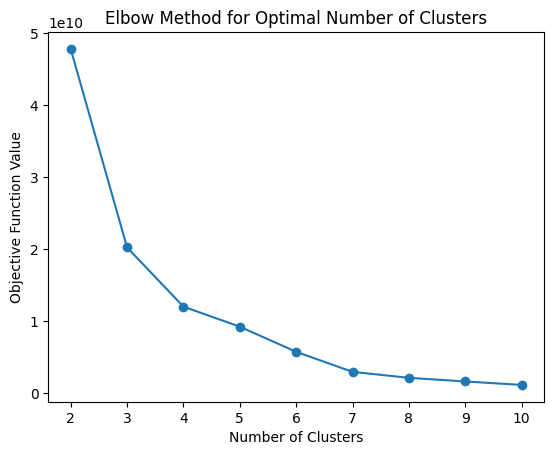

In [16]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung fungsi objektif (sum of squared errors)
def calculate_objective_function(data, weight, c, beta):
    miu = weight ** beta
    result = pd.DataFrame()
    for i in range(c.shape[0]):
        result[f"Col_{i+1}"] = ((data - c[i]) ** 2) * miu.iloc[:, i]
    r_n = result.sum(axis=1)
    return r_n.sum()

# Menyimpan fungsi objektif untuk berbagai jumlah kluster
num_clusters_list = range(2, 11)  # Menguji jumlah kluster dari 2 hingga 10
objective_values = []

for num_clusters in num_clusters_list:
    print(f"\nEvaluating for {num_clusters} clusters")
    
    # Inisialisasi derajat keanggotaan awal
    weight = pd.DataFrame(np.random.dirichlet(np.ones(num_clusters), size=len(data)))
    
    p0 = 0  # Fungsi objektif awal
    iteration_count = 0
    max_change = float('inf')
    
    # Fuzzy c-means clustering untuk jumlah kluster yang berbeda
    while max_change >= tol and iteration_count < max_iter:
        # Derajat keanggotaan dipangkatkan dengan indeks fuzziness
        miu = weight ** beta

        # Jumlah setiap kolom dari (derajat keanggotaan dipangkatkan dengan indeks fuzziness)
        sm = miu.sum(axis=0)

        # Mengalikan setiap elemen baris data dengan baris yang sesuai
        iterasi = miu.multiply(data, axis=0)

        # Jumlah setiap kolom dari (hasil perkalian)
        si = iterasi.sum(axis=0)

        # Menghitung pusat cluster (c)
        c = si / sm

        # Fungsi objektif
        p1 = calculate_objective_function(data, weight, c, beta)

        # Menghitung perubahan fungsi objektif
        max_change = abs(p1 - p0)
        p0 = p1

        # Update derajat keanggotaan (weight)
        result1 = pd.DataFrame()
        for i in range(c.shape[0]):
            result1[f"L{i+1}"] = ((data - c[i]) ** (-2 / (beta - 1)))

        r1_n = result1.sum(axis=1)

        # Membagi setiap elemen di result1 dengan elemen di r1_n berdasarkan baris
        weight = result1.div(r1_n, axis=0)
        
        # Increment iteration counter
        iteration_count += 1
    
    # Menyimpan nilai fungsi objektif untuk jumlah kluster ini
    objective_values.append(p1)

# Plotting fungsi objektif vs jumlah kluster
plt.plot(num_clusters_list, objective_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Objective Function Value')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [17]:
# Menghitung PCI
def compute_pci(final_weight_n, num_data, num_clusters):
    pci = (1 / num_data) * np.sum(np.sum(final_weight_n**2, axis=1))
    return pci

# Menghitung PCI
num_data = len(data)
pci_value = compute_pci(final_weight_n, num_data, num_clusters)
print(f"Partition Coefficient Index (PCI): {pci_value}")

Partition Coefficient Index (PCI): 0.8388825256637759


In [18]:
# Data observasi keanggotaan
df = pd.DataFrame({
    't': range(1, len(data) + 1),  # Waktu dari 1 hingga 26
    'X_t': data,  # Kolom kedua sebagai X_t
    'L1' : final_weight_n.iloc[:, 0].values,
    'L2' : final_weight_n.iloc[:, 1].values,
    'L3' : final_weight_n.iloc[:, 2].values,
})
df

,t,X_t,L1,L2,L3
0,1,828960,0.957602,0.026962,0.015436
1,2,838628,0.972038,0.017902,0.010060
2,3,850176,0.986505,0.008714,0.004780
3,4,862314,0.996827,0.002069,0.001104
4,5,874795,0.999850,0.000099,0.000051
5,6,884727,0.994799,0.003459,0.001742
6,7,895327,0.980103,0.013373,0.006525
7,8,905869,0.954030,0.031242,0.014729
8,9,915876,0.917217,0.056901,0.025882
9,10,1041951,0.064933,0.826953,0.108114


In [19]:
# Menyimpan DataFrame ke file Excel
file_path = "df.xlsx"
df.to_excel(file_path, index=False, engine='openpyxl')

print(f"DataFrame telah disimpan ke file Excel di: {file_path}")

DataFrame telah disimpan ke file Excel di: df.xlsx


In [20]:
# List untuk menyimpan hasil
training_samples = []

# Loop untuk membuat pasangan input-target dengan operasi irisan (lag 6)
for i in range(5, len(df) - 1):  # Mulai dari indeks ke-5 untuk mempertimbangkan lag 6
    # Ambil derajat keanggotaan dari lag 6 (t-5, ..., t)
    input_row = [min(df.loc[j, f"L{k}"] for j in range(i - 5, i + 1)) for k in range(1, 4)]

    # Ambil target dari waktu t+1
    target_row = df.loc[i + 1, [f"L{k}" for k in range(1, 4)]].values

    # Simpan ke dalam list hasil
    training_samples.append({
        "t": df.loc[i + 1, "t"],
        **{f"Input {k}": input_row[k - 1] for k in range(1, 4)},
        **{f"Target {k}": target_row[k - 1] for k in range(1, 4)}
    })

# Konversi hasil ke DataFrame
training_df = pd.DataFrame(training_samples)
training_df

,t,Input 1,Input 2,Input 3,Target 1,Target 2,Target 3
0,7,0.957602,0.000099,0.000051,0.980103,0.013373,0.006525
1,8,0.972038,0.000099,0.000051,0.954030,0.031242,0.014729
2,9,0.954030,0.000099,0.000051,0.917217,0.056901,0.025882
3,10,0.917217,0.000099,0.000051,0.064933,0.826953,0.108114
4,11,0.064933,0.000099,0.000051,0.070411,0.817710,0.111879
5,12,0.064933,0.003459,0.001742,0.005164,0.973104,0.021732
6,13,0.005164,0.013373,0.006525,0.000284,0.997560,0.002156
7,14,0.000284,0.031242,0.002156,0.005398,0.926051,0.068551
8,15,0.000284,0.056901,0.002156,0.009188,0.832359,0.158453
9,16,0.000284,0.817710,0.002156,0.009922,0.262197,0.727880


In [21]:
# Menyimpan DataFrame ke file Excel
file_path = "training_df.xlsx"
training_df.to_excel(file_path, index=False, engine='openpyxl')

print(f"DataFrame telah disimpan ke file Excel di: {file_path}")

DataFrame telah disimpan ke file Excel di: training_df.xlsx


### 3. Mendefinisikan hubungan samar dengan Feedforward Artificial Neural Network (FFANN)

In [22]:
pip install tf-levenberg-marquardt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:

# Mengambil dataframe input dan target dari training_df
X = training_df[["Input 1", "Input 2", "Input 3"]].values  
y = training_df[["Target 1", "Target 2", "Target 3"]].values  


In [24]:
import time
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tf_levenberg_marquardt as lm
from sklearn.model_selection import train_test_split
import pandas as pd

In [25]:
# Split data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Konversi ke format TensorFlow
X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)

# Dataset TensorFlow untuk training
batch_size = 16
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(len(X_train))
train_dataset = train_dataset.batch(batch_size).repeat(10).cache()
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [27]:
#Model ANN
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),   # Input layer
    keras.layers.Dense(8, activation='sigmoid'), # Hidden layer
    keras.layers.Dense(y.shape[1], activation='sigmoid') # Output layer
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59 (236.00 B)

 Trainable params: 59 (236.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Wrapper untuk Levenberg-Marquardt
model_wrapper = lm.model.ModelWrapper(keras.models.clone_model(model))
model_wrapper.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=lm.loss.MeanSquaredError(),
)

In [ ]:
print('\nTraining menggunakan Levenberg-Marquardt')
t2_start = time.perf_counter()
history = model_wrapper.fit(
    train_dataset,
    epochs=100  
)
t2_stop = time.perf_counter()
print('Waktu yang dibutuhkan: ', t2_stop - t2_start)


Training menggunakan Levenberg-Marquardt
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - attempts: 1.3636 - damping_factor: 1.0137e-05 - loss: 0.2219
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - attempts: 2.0909 - damping_factor: 2.6364e-08 - loss: 0.1753
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - attempts: 1.9091 - damping_factor: 5.8273e-09 - loss: 0.1493
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - attempts: 1.8182 - damping_factor: 5.7455e-09 - loss: 0.1269
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - attempts: 1.0000 - damping_factor: 1.0000e-10 - loss: 0.1031
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - attempts: 1.3636 - damping_factor: 1.0000e-10 - loss: 0.0779
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - attempts: 1.3636 - damping_factor: 1.0000e-10 - loss: 0.0578
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - attempts: 1.8182 - damping_factor: 1.0000e-10 - loss: 0.0481
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━

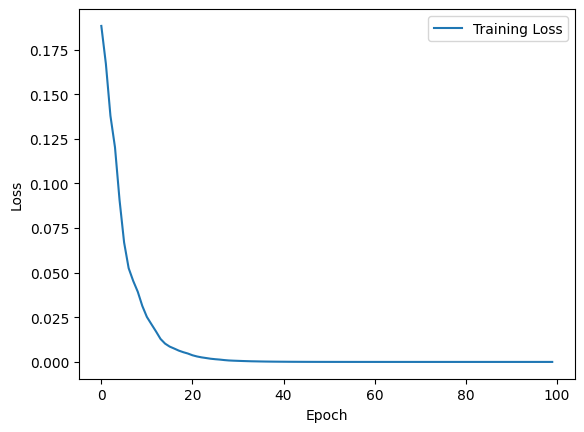

In [30]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Plot hasil prediksi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


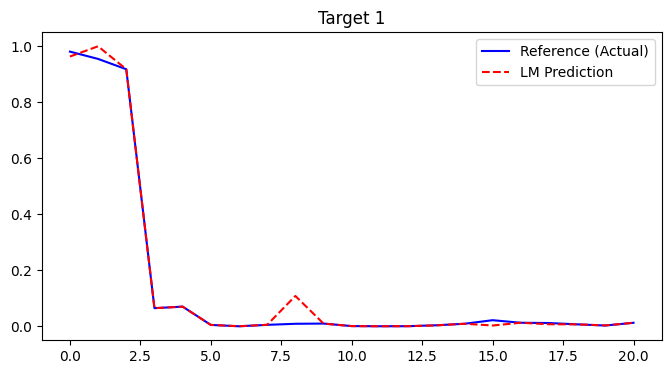

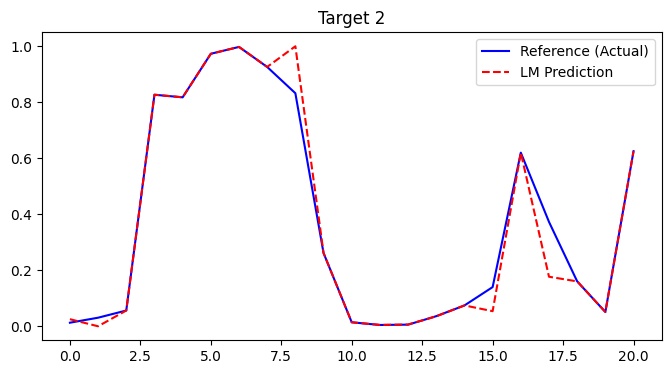

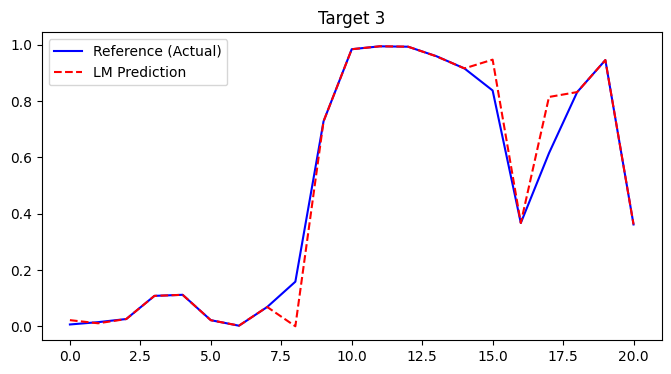

In [31]:
# Visualisasi hasil
print('\nPlot hasil prediksi')
y_pred_lm = model_wrapper.predict(X)
y_pred_lm


# Hasil visualisasi
for i in range(y.shape[1]):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(y)), y[:, i], 'b-', label='Reference (Actual)')
    plt.plot(range(len(y_pred_lm)), y_pred_lm[:, i], 'r--', label='LM Prediction')
    plt.title(f"Target {i+1}")
    plt.legend()
    plt.show()


In [32]:
# Cetak hasil prediksi
print("Hasil Prediksi dengan Levenberg-Marquardt:")
print(pd.DataFrame(y_pred_lm))

Hasil Prediksi dengan Levenberg-Marquardt:
           0         1         2
0   0.962521  0.025902  0.021864
1   0.999115  0.000626  0.010774
2   0.917184  0.056915  0.025845
3   0.064854  0.826999  0.108067
4   0.070329  0.817780  0.111826
5   0.005153  0.972998  0.021598
6   0.000370  0.997624  0.002418
7   0.005571  0.926162  0.068650
8   0.108473  0.999871  0.000099
9   0.009896  0.262186  0.727845
10  0.000866  0.014851  0.984059
11  0.000337  0.005503  0.994541
12  0.000651  0.006845  0.993146
13  0.003405  0.036151  0.959039
14  0.009355  0.075100  0.915966
15  0.003004  0.054525  0.947076
16  0.012883  0.620172  0.366875
17  0.007461  0.177455  0.814506
18  0.007122  0.160820  0.831891
19  0.003368  0.051746  0.945680
20  0.012704  0.625416  0.361720


In [33]:
# Menyimpan DataFrame ke file Excel
file_path = "y_pred_lm.xlsx"
pd.DataFrame(y_pred_lm).to_excel(file_path, index=False, engine='openpyxl')

print(f"DataFrame telah disimpan ke file Excel di: {file_path}")

DataFrame telah disimpan ke file Excel di: y_pred_lm.xlsx


### 4. Defuzzifikasi Hasil Peramalan

In [34]:
def defuzzify_fuzzy_forecast(y_pred_lm, final_c):
    """
    Perform defuzzification using the weighted average method.

    Parameters:
        predictions (np.ndarray): Matrix of fuzzy membership values.
        centroids (list or np.ndarray): Centroids (representative values) of the fuzzy sets.

    Returns:
        np.ndarray: Crisp forecast values.
    """
    y_pred_lm = np.array(y_pred_lm)
    final_c= np.array(final_c)

    # Validate shapes
    if y_pred_lm.shape[1] != len(final_c):
        raise ValueError("The number of centroids must match the number of fuzzy sets.")

    # Normalize fuzzy membership values
    weights = y_pred_lm / y_pred_lm.sum(axis=1, keepdims=True)

    # Compute crisp forecast as a weighted sum of centroids
    crisp_values = np.dot(weights, final_c)
    return crisp_values

# Perform defuzzification
crisp_forecast_values = defuzzify_fuzzy_forecast(y_pred_lm, final_c)

# Display results
print("Crisp Forecast Values:")
print(pd.DataFrame(crisp_forecast_values, columns=["Crisp Value"]).map('{:.2f}'.format))


Crisp Forecast Values:
   Crisp Value
0    884718.61
1    875996.90
2    892761.30
3   1084384.67
4   1083512.74
5   1090081.62
6   1089511.44
7   1093930.21
8   1068187.31
9   1148212.71
10  1171644.47
11  1172586.90
12  1172380.39
13  1169092.04
14  1164051.21
15  1167704.39
16  1117328.23
17  1156033.37
18  1157536.04
19  1167806.90
20  1116937.80


In [35]:
# Menyimpan DataFrame ke file Excel
file_path = "crisp.xlsx"
pd.DataFrame(crisp_forecast_values, columns=["Crisp Value"]).map('{:.2f}'.format).to_excel(file_path, index=False, engine='openpyxl')

print(f"DataFrame telah disimpan ke file Excel di: {file_path}")

DataFrame telah disimpan ke file Excel di: crisp.xlsx


### 5. Perhitungan Nilai MAPE

In [36]:

import numpy as np

def calculate_mape(actual, predicted):
    """
    Menghitung Mean Absolute Percentage Error (MAPE).
    
    Parameters:
    - actual: Array data asli (numpy array).
    - predicted: Array prediksi (numpy array).
    
    Returns:
    - mape: Nilai MAPE dalam persen.
    """
    actual, predicted = np.array(actual), np.array(predicted)

    # Pastikan panjang prediksi dan data asli sesuai
    if len(predicted) != len(actual):
        raise ValueError("Panjang prediksi tidak sesuai dengan data asli.")

    # Hitung MAPE
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mape

# Data asli setelah baris ke-7
data_actual = np.array(data[6:])  # Konversi ke numpy array

# Prediksi setelah defuzzifikasi
predicted = np.array(crisp_forecast_values.flatten())  

# Pisahkan kembali data sesuai pembagian train-test (80% training, 20% testing)
split_index = int(len(data_actual) * 0.8)  # 80% training, 20% testing

y_train_actual = data_actual[:split_index]
y_train_pred = predicted[:split_index]

y_test_actual = data_actual[split_index:]
y_test_pred = predicted[split_index:]

# Hitung MAPE untuk data training dan testing
mape_train = calculate_mape(y_train_actual, y_train_pred)
mape_test = calculate_mape(y_test_actual, y_test_pred)

print(f"MAPE Data Training: {mape_train:.2f}%")
print(f"MAPE Data Testing: {mape_test:.2f}%")


MAPE Data Training: 2.22%
MAPE Data Testing: 1.00%


In [37]:
def calculate_mape(data, crisp_forecast):
    """
    Menghitung Mean Absolute Percentage Error (MAPE) dengan data asli dimulai dari baris ke-7.
    
    Parameters:
    - data: Array data asli (1D).
    - crisp_forecast: Array prediksi (1D).
    
    Returns:
    - mape: Nilai MAPE dalam persen.
    """
    # Data asli dimulai dari baris ke-7
    actual = data[6:]  # Mengambil data dari indeks 6 hingga akhir

    # Pastikan panjang prediksi dan data asli sesuai
    if len(crisp_forecast_values) != len(actual):
        raise ValueError("Panjang prediksi tidak sesuai dengan data asli dimulai dari baris ke-7.")

    # Hitung MAPE
    mape = np.mean(np.abs((actual - crisp_forecast_values) / actual)) * 100
    return mape

# Prediksi (hasil fuzzy forecast setelah defuzzifikasi)
predicted = crisp_forecast_values.flatten()

# Hitung MAPE
mape = calculate_mape(data, predicted)

# Tampilkan hasil MAPE
print("\nMean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 1.93%


In [39]:
# Membuat input untuk peramalan 1 periode ke depan
last_six_data = df.tail(6)
last_six_input = [min(last_six_data[f"L{k}"].iloc[j] for j in range(len(last_six_data) - 6, len(last_six_data))) for k in range(1, 4)]

# Membuat DataFrame untuk input
input_df = pd.DataFrame([last_six_input], columns=["Input 1", "Input 2", "Input 3"])

# Melakukan prediksi menggunakan model
next_period_prediction = model_wrapper.predict(input_df)

# Defuzzifikasi hasil prediksi
next_period_crisp = defuzzify_fuzzy_forecast(next_period_prediction, final_c)

# Menampilkan hasil prediksi crisp untuk periode berikutnya

print("Prediksi Crisp untuk Periode Berikutnya:")
print(pd.DataFrame(next_period_crisp, columns=["Crisp Value"]).map('{:.2f}'.format))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediksi Crisp untuk Periode Berikutnya:
  Crisp Value
0  1110478.42
